# Εβδομάδα 2 - Επεξεργασία φυσικής γλώσσας σε σώματα κειμένων 

**Θεωρία**

**Natural Language Processing (NLP)**: Η επεξεργασία φυσικής γλώσσας είναι ένας υποτομέας της επιστήμης των υπολογιστών, της τεχνητής νοημοσύνης και της γλωσσολογίας που έχει ως στόχο την κατανόηση της φυσικής γλώσσας με τη χρησιμοποίηση των ηλεκτρονικών υπολογιστών. 

**Information Extraction from text (ΙΕ)**: Η εξαγωγή πληροφορίας είναι η διαδικασία της αυτόματης εξαγωγής πληροφορίας ή δεδομένων από αδόμητα ή ημιδομημένα κείμενα. Συνήθως πρόκειται για το εναρκτήριο βήμα για άλλους αλγόριθμους εξόρυξης κειμένου. Για παράδειγμα η εξαγωγή οντοτήτων, Name Entity Recognition (NER), και οι σχέσεις αυτών μέσω του κειμένου που μας δίνουν χρήσιμη σημασιολογική πληροφορία. 

Αυτή την εβδομάδα παίρνουμε τα σώματα κειμένων που έχουμε στην κατοχή μας και τα αναλύουμε. Βρίσκουμε και μετράμε λέξεις, φράσεις και ιδιότητες (π.χ. word frequency distributions). Αρχικά, μοντελοποιούμε τον τρόπο με τον οποίο κάνουμε αναζήτηση μέσα στα corpora για λέξεις κλειδιά (keywords) και φράσεις. Στην συνέχεια, εξετάζουμε τη διανομή των όρων και των φράσεων μέσα στα κείμενα και τις the συσχετίσεις (corelations) μεταξύ διαφορετικών λέξεων και φράσεων. Προκειμένου να καταφέρουμε τα παραπάνω, αρχικά προσπαθούμε να αποσαφηνίσουμε τις λέξεις χρησιμοποιώντας σήμανση μερών του λόγου (part-of-speech POS) tagging, και απλοποιούμε τις λέξεις με αλγορίθμους στελέχωση (stemming) και λημματισμό (lemmatization). Μετά ξεχωρίζουμε τις *σημαντικές* λέξεις και φράσεις και τις οπτικοποιούμε σε word cloud ή Wordl! Στην συνέχεια μετράμε τις συχνότητες λέξεων (word frequencies), τις εξαρτημένες συχνότητες λέξεων (όταν μία συχνότητα μιας λέξης εξαρτάται από την ύπαρξη μιας άλλης λέξης), στατιστικά σημαντικές [λεξιλογικές συνάψεις](https://repository.kallipos.gr/bitstream/11419/1934/1/02_chapter_4.pdf) (collocations), οι συνάψεις αποτελούν μια αυθαίρετη σύζευξη λέξεων την οποία μπορούν να πραγματοποιήσουν με άνεση κυρίως οι φυσικοί ομιλητές της γλώσσας. Στο τέλος υπολογίσουμε και θα οπτικοποιήσουμε αποκλίσεις και αποστάσεις (Divergences και Distances) μεταξύ των συχνοτήτων λέξεων μεταξύ δύο διαφορετικών σωμάτων κειμένων (corpora). 

Για το συγκεκριμένο notebook θα χρειαστούμε τα εξής πακέτα:

In [2]:
#import lucem_illud #pip install git+git://github.com/Computational-Content-Analysis-2018/lucem_illud.git
#βιβλιοθήκη που έφτιαξε το πανεπιστήμιο του Σικάγο για nlp

#Εγκατάσταση πακέτων με pip
import requests #για http requests
import nltk #για Επεξεργασία φυσικής γλώσσας Natural Language Toolkit
import pandas #DataFrames
import matplotlib.pyplot as plt #Για γραφικά
import wordcloud #Για word clouds
import numpy as np 
import scipy #Για διαφορές και αποστάσεις
import seaborn as sns #κάνει τα γραφήματα (plot) πιο όμορφα
import sklearn.manifold #Για manifold plot
from nltk.corpus import stopwords #Για stopwords
import json #Για API responses
import urllib.parse #Για ένωση urls

#Για να εμφανίζονται τα γραφήματα
%matplotlib inline

# Ανάκτηση σωμάτων κειμένων

Ας ξεκινήσουμε κατεβάζοντας μερικά έτοιμα σώματα κειμένων από το `nltk`, ένα Natural Language Toolkit που έφτιαξαν οι computational γλωσσολόγοι του πανεπιστημίου της Pennsylvania. 
Ας κατεβάσουμε πρώτα το Gutenburg corpus, με το [corpus module](http://www.nltk.org/api/nltk.corpus.html). Για να ξεκινήσουμε πρέπει πρώτα να πούμε στη βιβλιοθήκη nltk που είναι τα data και να τα κατεβάσουμε.

In [3]:
#Πρέπει να τα κατεβάσετε πρώτα σε ένα data directory
try:
    #προσθέστε το path έιτε για local ή για server, μόνο το ένα θα χρησιμοποιηθεί τη φορά
    nltk.data.path.append('/project2/macs60000/shared_data/nltk')
    nltk.data.path.append('../data')
    #Τσεκάρετε ότι όλα είναι στη θέση τους
    nltk.corpus.gutenberg.fileids()
except LookupError:
    print("You have to download all the documents")
    print("Downloading to ../data this should only take a couple minutes")
    nltk.download('all', download_dir = '../data')
    nltk.data.path.append('../data')
#Αν δεν τα έχετε κατεβάσει δοκιμάστε `nltk.download()`
print(nltk.corpus.gutenberg.fileids())
print(len(nltk.corpus.gutenberg.fileids()))

You have to download all the documents


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to ../data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to ../data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to ../data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to ../data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to ../data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to ../data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to ../data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to ../data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package city_database to ../data

[nltk_data]    |   Unzipping corpora/verbnet3.zip.
[nltk_data]    | Downloading package webtext to ../data...
[nltk_data]    |   Unzipping corpora/webtext.zip.
[nltk_data]    | Downloading package wordnet to ../data...
[nltk_data]    |   Unzipping corpora/wordnet.zip.
[nltk_data]    | Downloading package wordnet_ic to ../data...
[nltk_data]    |   Unzipping corpora/wordnet_ic.zip.
[nltk_data]    | Downloading package words to ../data...
[nltk_data]    |   Unzipping corpora/words.zip.
[nltk_data]    | Downloading package ycoe to ../data...
[nltk_data]    |   Unzipping corpora/ycoe.zip.
[nltk_data]    | Downloading package rslp to ../data...
[nltk_data]    |   Unzipping stemmers/rslp.zip.
[nltk_data]    | Downloading package maxent_treebank_pos_tagger to
[nltk_data]    |     ../data...
[nltk_data]    |   Unzipping taggers/maxent_treebank_pos_tagger.zip.
[nltk_data]    | Downloading package universal_tagset to ../data...
[nltk_data]    |   Unzipping taggers/universal_tagset.zip.
[nltk_dat

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']
18


[nltk_data]    |   Unzipping misc/mwa_ppdb.zip.
[nltk_data]    | 
[nltk_data]  Done downloading collection all


Μπορούμε να τα δούμε και ξεχωριστά

In [4]:
nltk.corpus.gutenberg.raw('shakespeare-macbeth.txt')[2000:4000]

"es,\nBut the Norweyan Lord, surueying vantage,\nWith furbusht Armes, and new supplyes of men,\nBegan a fresh assault\n\n   King. Dismay'd not this our Captaines, Macbeth and\nBanquoh?\n  Cap. Yes, as Sparrowes, Eagles;\nOr the Hare, the Lyon:\nIf I say sooth, I must report they were\nAs Cannons ouer-charg'd with double Cracks,\nSo they doubly redoubled stroakes vpon the Foe:\nExcept they meant to bathe in reeking Wounds,\nOr memorize another Golgotha,\nI cannot tell: but I am faint,\nMy Gashes cry for helpe\n\n   King. So well thy words become thee, as thy wounds,\nThey smack of Honor both: Goe get him Surgeons.\nEnter Rosse and Angus.\n\nWho comes here?\n  Mal. The worthy Thane of Rosse\n\n   Lenox. What a haste lookes through his eyes?\nSo should he looke, that seemes to speake things strange\n\n   Rosse. God saue the King\n\n   King. Whence cam'st thou, worthy Thane?\n  Rosse. From Fiffe, great King,\nWhere the Norweyan Banners flowt the Skie,\nAnd fanne our people cold.\nNorway hi

Τα κείμενα είναι έτοιμα και ομαδοποιημένα για μας οπότε μπορούμε να βλέπουμε κατευθείαν τις λέξεις κ.λπ. 

In [4]:
print(nltk.corpus.gutenberg.words('shakespeare-macbeth.txt'))
print(nltk.corpus.gutenberg.sents('shakespeare-macbeth.txt'))

['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', ...]
[['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', 'William', 'Shakespeare', '1603', ']'], ['Actus', 'Primus', '.'], ...]


# Μέτρημα λέξεων

Για να ξεκινήσουμε την ανάλυση πρώτα μετράμε πόσες φορές εμφανίζεται κάθε λέξη στο corpus.

In [6]:
def wordCounter(wordLst):
    wordCounts = {}
    for word in wordLst:
        #κάνουμε τα κεφαλαία μικρά
        wLower = word.lower()
        if wLower in wordCounts:
            wordCounts[wLower] += 1
        else:
            wordCounts[wLower] = 1
    #μετατροπή σε DataFrame
    countsForFrame = {'word' : [], 'count' : []}
    for w, c in wordCounts.items():
        countsForFrame['word'].append(w)
        countsForFrame['count'].append(c)
    return pandas.DataFrame(countsForFrame)

countedWords = wordCounter(nltk.corpus.gutenberg.words('shakespeare-macbeth.txt'))
countedWords[:10]

,word,count
0,[,4
1,the,650
2,tragedie,2
3,of,338
4,macbeth,62
5,by,49
6,william,1
7,shakespeare,1
8,1603,1
9,],4


Το `wordCounter()` είναι ένα απλό function και αυτό γιατί η περισσότερη δύσκολη δουλειά έχει ήδη γίνει από το `nltk`. Αν το κείμενο δεν ήταν έτοιμο, όπως τώρα, πρέπει πρώτα να κάνουμε tokenize και να δούμε πως θα αντιμετωπίσουμε ό,τι δεν είναι κείμενο (non-word characters).

Το nltk έχει ήδη έτοιμο τρόπο για να μετράμε frequency distribution από μια λίστα με λέξεις:

In [7]:
words = [word.lower() for word in nltk.corpus.gutenberg.words('shakespeare-macbeth.txt')]
freq = nltk.FreqDist(words)
print (freq['macbeth'])

62


Ας σορτάρουμε τις μετρήσεις ώστε να εξερευνήσουμε τη διανομή των συχνοτήτων των λέξεων. 


In [9]:
#Με το in place (αλλάζουμε το original DataFrame) καθώς δεν χρειαζόμαστε το ασορτάριστο πλέον. 
countedWords.sort_values('count', ascending=False, inplace=True)
countedWords[:100]

,word,count
29,",",1962
12,.,1235
1,the,650
36,',637
16,and,546
64,:,477
54,to,384
56,i,348
3,of,338
27,?,241


Τα σημεία στίξης, καθώς και οι σύνδεσμοι, οι αντωνυμίες, τα άρθρα κ.λπ. αποτελούν μεγάλο μέρος του κειμένου, αλλά δεν έχουν κανένα ενδιαφέρον για μας και πολλές φο΄ρες δυσκολέυουν την ανάλυση. Μπορούμε να τις αφαιρέσουμε, έχοντας μία λίστα από stopwords, ή με την χρήση ορισμένων μεθόδων μέτρησης συχνότητας που θα δούμε στην συνέχεια.  

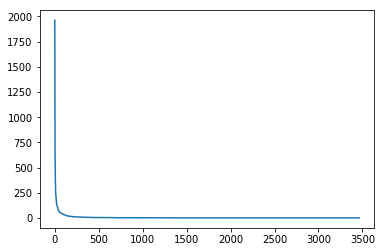

In [12]:
#Με τα γραφήματα και τα axis μπορούμε να αλλάξουμε την κλίμακα ή να προσθέσουμε τίτλους. 
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(len(countedWords)), countedWords['count'])
plt.show()

Αυτό δείχνει ότι η πιθανότητα να εμφανιστεί μία λέξη είναι αντιστρόφως ανάλογη με την κατάταξή της. Αυτό το φαινόμενο ονομάζεται [Zipf's Law](https://en.wikipedia.org/wiki/Zipf%27s_law). Σύμφωνα με αυτόν τον κανόνα η πιο συχνή λέξη θα εμφανιστεί περίπου δυο φορές συχνότερα από την δεύτερη πιο συχνή λέξη και τρεις φορές συχνότερα από την τρίτη πιο συχνή λέξη κ.λπ.  Ο κανόνας του Zipf μπορεί να παρατηρηθεί εύκολα όταν οπτικοποιήσουμε τα δεδομένα με ένα log-log graph, όταν το axes είναι "μακρύ"(rank order) και η συχνότητα επίσης, προκαλώντας μία linear σχέση. 

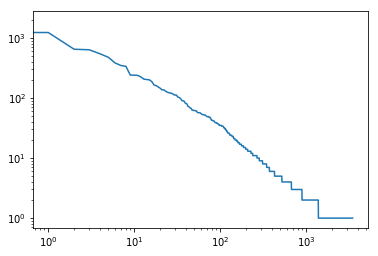

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(len(countedWords)), countedWords['count'])
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

Γενικά ο κανόνας αυτός βασίζεται και στην αρχή της ελάχιστης προσπάθειας, καθώς συνήθως οι ομιλητές δεν εργάζονται αρκετά στο κείμενό τους ώστε να αποδώσουν την ιδέα που επιθυμούν να επικοινωνήσουν στο ακρωατήριο ή πολλές φορές χρησιμοποιούν κατά κόρον δημοφιλείς λέξεις ( [preferential attachment] )(https://en.wikipedia.org/wiki/Preferential_attachment).

Υπάρχουν και πολλές άλλες ιδιότητες λέξεων που μπορούμε να δούμε, όπως οι περιβάλλουσες λέξεις με την χρήση της συν-εμφάνισης (concordance) μέσω του `ConcordanceIndex`.

In [14]:
macbethIndex = nltk.text.ConcordanceIndex(nltk.corpus.gutenberg.words('shakespeare-macbeth.txt'))

Μετά μπορούμε να βρούμε ποιες λέξεις εμφανίζονται συχνά μαζί. Ας δούμε τη λέξη `'macbeth'`.

In [15]:
macbethIndex.print_concordance('macbeth')

no matches


Ορίστε?! Η λέξη `'macbeth'` δεν εμφανίζεται πουθενά στο κείμενο. Τι γίνεται? 

Το `ConcordanceIndex` δίνει σημασία στα κεφαλαία γράμματα, μήπως φταίει αυτό? 

In [16]:
macbethIndex.print_concordance('Macbeth')

Displaying 25 of 25 matches:
 Macbeth by William Shakespeare 1603 ] Actus
on the Heath 3 . There to meet with Macbeth 1 . I come , Gray - Malkin All . Pa
: but all ' s too weake : For braue Macbeth ( well hee deserues that Name ) Dis
Dismay ' d not this our Captaines , Macbeth and Banquoh ? Cap . Yes , as Sparro
h , And with his former Title greet Macbeth Rosse . Ile see it done King . What
ne King . What he hath lost , Noble Macbeth hath wonne . Exeunt . Scena Tertia 
 within . 3 . A Drumme , a Drumme : Macbeth doth come All . The weyward Sisters
e , the Charme ' s wound vp . Enter Macbeth and Banquo . Macb . So foule and fa
 can : what are you ? 1 . All haile Macbeth , haile to thee Thane of Glamis 2 .
 thee Thane of Glamis 2 . All haile Macbeth , haile to thee Thane of Cawdor 3 .
 thee Thane of Cawdor 3 . All haile Macbeth , that shalt be King hereafter Banq
2 . Hayle 3 . Hayle 1 . Lesser than Macbeth , and greater 2 . Not so happy , ye
 though thou be none : So all haile Macbeth , 

Μια χαρά. Ας βρούμε κάτι λιγότερο συχνό. 

In [17]:
print(countedWords[countedWords['word'] == 'donalbaine'])
macbethIndex.print_concordance('Donalbaine')

          word  count
80  donalbaine      7
Displaying 7 of 7 matches:
arum within . Enter King Malcome , Donalbaine , Lenox , with attendants , meetin
 . Enter King , Lenox , Malcolme , Donalbaine , and Attendants . King . Is execu
 Torches . Enter King , Malcolme , Donalbaine , Banquo , Lenox , Macduff , Rosse
s i ' th ' second Chamber ? Lady . Donalbaine Mac . This is a sorry sight Lady .
rther , and Treason , Banquo , and Donalbaine : Malcolme awake , Shake off this 
 , to brag of . Enter Malcolme and Donalbaine . Donal . What is amisse ? Macb . 
ey were subborned , Malcolme , and Donalbaine the Kings two Sonnes Are stolne aw


# Ανάκτηση και επεξεργασία raw κειμένου

Για αρχή, θα πάρουμε ένα σώμα από δελτία τύπου από το *GitHub API* που αρχειοθέτησε ο πολιτικός επιστήμονας Justin Grimmer. 

Οι GitHub API requests γίνονται στο `'https://api.github.com/'` και οι απαντήσεις είναι σε μορφή  JSON, όπως ακριβώς κάναμε με το Tumblr API.

Θα πάρουμε τις πληροφορίες μας από το  [github.com/lintool/GrimmerSenatePressReleases](https://github.com/lintool/GrimmerSenatePressReleases) 

In [18]:
r = requests.get('https://api.github.com/repos/lintool/GrimmerSenatePressReleases')
senateReleasesData = json.loads(r.text)
print(senateReleasesData.keys())
print(senateReleasesData['description'])

dict_keys(['id', 'node_id', 'name', 'full_name', 'private', 'owner', 'html_url', 'description', 'fork', 'url', 'forks_url', 'keys_url', 'collaborators_url', 'teams_url', 'hooks_url', 'issue_events_url', 'events_url', 'assignees_url', 'branches_url', 'tags_url', 'blobs_url', 'git_tags_url', 'git_refs_url', 'trees_url', 'statuses_url', 'languages_url', 'stargazers_url', 'contributors_url', 'subscribers_url', 'subscription_url', 'commits_url', 'git_commits_url', 'comments_url', 'issue_comment_url', 'contents_url', 'compare_url', 'merges_url', 'archive_url', 'downloads_url', 'issues_url', 'pulls_url', 'milestones_url', 'notifications_url', 'labels_url', 'releases_url', 'deployments_url', 'created_at', 'updated_at', 'pushed_at', 'git_url', 'ssh_url', 'clone_url', 'svn_url', 'homepage', 'size', 'stargazers_count', 'watchers_count', 'language', 'has_issues', 'has_projects', 'has_downloads', 'has_wiki', 'has_pages', 'forks_count', 'mirror_url', 'archived', 'open_issues_count', 'license', 'fork

Αυτό που μας ενδιαφέρει είναι το  `'contents_url'`

In [19]:
print(senateReleasesData['contents_url'])

https://api.github.com/repos/lintool/GrimmerSenatePressReleases/contents/{+path}


Μπορούμε να κατεβάσουμε όλα τα αρχείο από το repo.

In [20]:
r = requests.get('https://api.github.com/repos/lintool/GrimmerSenatePressReleases/contents/raw/Whitehouse')
whitehouseLinks = json.loads(r.text)
whitehouseLinks[0]

{'name': '10Apr2007Whitehouse123.txt',
 'path': 'raw/Whitehouse/10Apr2007Whitehouse123.txt',
 'sha': 'f524289ee563dca58690c8d36c23dce5dbd9962a',
 'size': 2206,
 'url': 'https://api.github.com/repos/lintool/GrimmerSenatePressReleases/contents/raw/Whitehouse/10Apr2007Whitehouse123.txt?ref=master',
 'html_url': 'https://github.com/lintool/GrimmerSenatePressReleases/blob/master/raw/Whitehouse/10Apr2007Whitehouse123.txt',
 'git_url': 'https://api.github.com/repos/lintool/GrimmerSenatePressReleases/git/blobs/f524289ee563dca58690c8d36c23dce5dbd9962a',
 'download_url': 'https://raw.githubusercontent.com/lintool/GrimmerSenatePressReleases/master/raw/Whitehouse/10Apr2007Whitehouse123.txt',
 'type': 'file',
 '_links': {'self': 'https://api.github.com/repos/lintool/GrimmerSenatePressReleases/contents/raw/Whitehouse/10Apr2007Whitehouse123.txt?ref=master',
  'git': 'https://api.github.com/repos/lintool/GrimmerSenatePressReleases/git/blobs/f524289ee563dca58690c8d36c23dce5dbd9962a',
  'html': 'https:/

Τώρα έχουμε μία λίστα από δελτία τύπου του Whitehouse.

In [21]:
r = requests.get(whitehouseLinks[0]['download_url'])
whitehouseRelease = r.text
print(whitehouseRelease[:1000])
len(whitehouseRelease)

SEN. WHITEHOUSE SHARES WESTERLY GIRL'S STORY IN PUSH FOR STEM CELL RESEARCH
  Sharing the story of Lila Barber, a 12 year old girl from Westerly, Sen. Sheldon Whitehouse (D-R.I.) on Tuesday, April 10, 2007, illustrated the hope stem cell research can offer in a speech on the Senate floor in favor of legislation to expand federal funding for stem cell research.  
   Whitehouse met Lila two weeks ago. She was diagnosed two years ago with osteosarcoma, a cancerous bone condition, and last year underwent cadaver bone transplant surgery. The procedure saved her leg and is helping her remain cancer-free, but the transplanted tissue will not grow with her and likely will break down over time. Stem cell research, Whitehouse explained, could vastly improve the care of patients like Lila by allowing surgeons to enhance transplants with a patient's own stem cells, which could replace the lost bone and cartilage, or grow entirely new replacement bones and joints. 
   "Stem cell research gives hope

2206

Το κείμενο είναι μια χαρά. Τώρα πρέπει να αναλύσουμε τις λέξεις και πρώτα θα χρειαστεί να κάνουμε χωρίσουμε τις λέξεις μεταξύ τους (tokenization).

In [22]:
whTokens = nltk.word_tokenize(whitehouseRelease)
whTokens[10:30]

['STEM',
 'CELL',
 'RESEARCH',
 'Sharing',
 'the',
 'story',
 'of',
 'Lila',
 'Barber',
 ',',
 'a',
 '12',
 'year',
 'old',
 'girl',
 'from',
 'Westerly',
 ',',
 'Sen.',
 'Sheldon']

Τα `whTokens` είναι μία λίστα από λέξεις που φτιάχτηκαν μέσω της μεθόδου του nltk `word_tokenize` που έφτιαξαν στο  [Penn Treebank tokenizer](http://www.nltk.org/api/nltk.tokenize.html#module-nltk.tokenize.treebank). Παρόλο που λειτουργεί καλύτερα από το απλό `.split(' ')`, που απλά αφαιρεί τα κενά, δεν αποτελεί την καλύτερη λύση. Το `word_tokenize` δεν λαμβάνει υπόψη τις προτάσεις και ουσιαστικά είναι ένα περίτεχνο regular expression (regex).

Αν αναζητούμε προτάσεις τότε μπορούμε να χρησιμοποιήσουμε το `nltk.sent_tokenize()`, το οποίο εμπεριέχει το  [Punkt Sentence tokenizer](http://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.punkt.PunktSentenceTokenizer), έναν αλγόριθμο μηχανικής μάθησης που δουλεύει πολύ καλά σε αρκετές γλώσσες. 

Μπορούμε ακόμη να χρησιμοποιήσουμε το [Stanford tokenizer](http://www.nltk.org/api/nltk.tokenize.html#module-nltk.tokenize.stanford) ή να φτιάξουμε το δικό μας με το  [`RegexpTokenizer()`](http://www.nltk.org/api/nltk.tokenize.html#module-nltk.tokenize.regexp). Η επιλογή του κατάλληλου tokenizer είναι πολύ σημαντική για την μετέπειτα ανάλυση. 

Για τον σκοπό της παρούσας ανάλυσης θα χρησιμοποιήσουμε το Penn Treebank tokenizer.

Για να εκμεταλλευτούμε τη λίστα λέξεων του `nltk`, και τα έτοιμα functions όπως το`concordance`, θα μετατρέψουμε τα κείμενα σε `Text`.

In [23]:
whText = nltk.Text(whTokens)

whitehouseIndex = nltk.text.ConcordanceIndex(whText) 
whitehouseIndex.print_concordance('Whitehouse')

Displaying 5 of 5 matches:
 girl from Westerly , Sen. Sheldon Whitehouse ( D-R.I. ) on Tuesday , April 10 ,
l funding for stem cell research . Whitehouse met Lila two weeks ago . She was d
n over time . Stem cell research , Whitehouse explained , could vastly improve t
earch might help or even cure , '' Whitehouse said . Whitehouse also praised the
r even cure , '' Whitehouse said . Whitehouse also praised the efforts of Rhode 


*Σημείωση* Ένα `Text` class χρησιμοποιείται για γρήγορη ανάλυση. Αν θέλουμε να κάνουμε αναλύσεις μεγαλύτερου βάθους χρησιμοποιούμε πιο εξειδικευμένα πακέτα όπως π.χ. το  [`collocations` Module](http://www.nltk.org/api/nltk.html#module-nltk.collocations) αντί για το απλό`.collocations()`.


Με τέτοιου είδους αναλύσεις μπορούμε να βρούμε λέξεις που εμφανίζονται μαζί και έχουν κάποιο σύνθετο, ιδιωματικό νόημα, εκφράσεις που χρησιμοποιούνται δηλαδή στον προφορικό λόγο ή σε διαλέκτους και δεν θα τις βρούμε π.χ. σε λεξικά ή σε άρθρα εφημερίδων.  

In [24]:
whText.collocations()

Rhode Island; stem cells; cell research; Cell Enhancement; Enhancement
Act; President Bush; Stem Cell; stem cell; Stem cell


Μπορούμε να διαλέξουμε μια λέξη ή παραπάνω και να δούμε ποιες λέξεις βρίσκονται συχνά γύρω τους.  

In [25]:
whText.common_contexts(['stem'])

for_cell hope_cell ._cell own_cells ``_cell of_cell on_cells the_cell
embryonic_cells


Ή να μετρήσουμε πόσες φορές εμφανίζονται.

In [26]:
whText.count('cell')

5

Επίσης, μπορούμε να οπτικοποιήσουμε (plot) κάθε φορά που ένα σετ λέξεων εμφανίζεται.

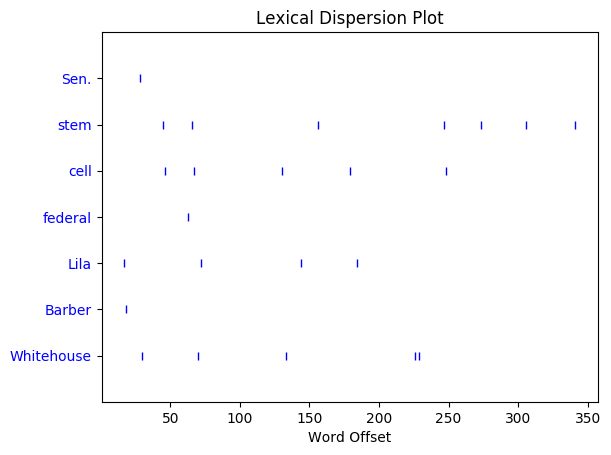

In [27]:
sns.reset_orig() #Επείδη το Seaborn χαλάει το συγκεκριμένο plot, το κάνουμε disable και μετά το ξαναενεργοποιούμε.
whText.dispersion_plot(['Sen.','stem', 'cell', 'federal' ,'Lila', 'Barber', 'Whitehouse'])
sns.set() 

Για να αναλύσουμε τα Whitehouse press releases πρέπει πρώτα να τα έχουμε τοπικά. Κοιτάμε ξανά το API, το URL που θέλουμε είναι [https://api.github.com/repos/lintool/GrimmerSenatePressReleases/contents/raw/Whitehouse](https://api.github.com/repos/lintool/GrimmerSenatePressReleases/contents/raw/Whitehouse), και γράφουμε ένα function για να κάνουμε scrape όλα τα αρχεία.

Αν ξεχάσατε τι χρειάζεται για να κατεβάσουμε αρχεία από APIs, δείτε το 1ο notebook.

In [28]:
def getGithubFiles(target, maxFiles = 100):
    #Βάζουμε ένα max για να μην αργήσει πολύ 
    #Φτιάχνουμε το dictionary εδώ για να γίνει μετά εύκολα DataFrame
    releasesDict = {
        'name' : [], #Tο όνομα του αρχείου
        'text' : [], #Tο κείμενου του αρχείου, προσοχή για binary αρχεία
        'path' : [], #Tο path του git repo για το αρχείο
        'html_url' : [], #Το url στο Github
        'download_url' : [], #Tο url για να γίνει download
    }

    #Παίρνουμε τις πληροφορίες από το directory του Github
    r = requests.get(target)
    filesLst = json.loads(r.text)

    for fileDict in filesLst[:maxFiles]:
        #Αυτά υπάρχουν στο directory
        releasesDict['name'].append(fileDict['name'])
        releasesDict['path'].append(fileDict['path'])
        releasesDict['html_url'].append(fileDict['html_url'])
        releasesDict['download_url'].append(fileDict['download_url'])

        #Παρόλα αυτά πρέπει να κατεβάσουμε το κείμενο
        text = requests.get(fileDict['download_url']).text
        releasesDict['text'].append(text)

    return pandas.DataFrame(releasesDict)

whReleases = getGithubFiles('https://api.github.com/repos/lintool/GrimmerSenatePressReleases/contents/raw/Whitehouse', maxFiles = 10)
whReleases[:5]

,name,text,path,html_url,download_url
0,10Apr2007Whitehouse123.txt,SEN. WHITEHOUSE SHARES WESTERLY GIRL'S STORY I...,raw/Whitehouse/10Apr2007Whitehouse123.txt,https://github.com/lintool/GrimmerSenatePressR...,https://raw.githubusercontent.com/lintool/Grim...
1,10Apr2008Whitehouse2.txt,SEN. WHITEHOUSE SAYS PRESIDENT BUSH MUST BEGIN...,raw/Whitehouse/10Apr2008Whitehouse2.txt,https://github.com/lintool/GrimmerSenatePressR...,https://raw.githubusercontent.com/lintool/Grim...
2,10Apr2008Whitehouse3.txt,EPA MUST REVIEW LEGAL PROCESS TO ROOT OUT POLI...,raw/Whitehouse/10Apr2008Whitehouse3.txt,https://github.com/lintool/GrimmerSenatePressR...,https://raw.githubusercontent.com/lintool/Grim...
3,10Aug2007Whitehouse78.txt,R.I. SENATORS PRAISE SEN. DENIAL OF LNG FACILI...,raw/Whitehouse/10Aug2007Whitehouse78.txt,https://github.com/lintool/GrimmerSenatePressR...,https://raw.githubusercontent.com/lintool/Grim...
4,10Jan2008Whitehouse35.txt,SEN. WHITEHOUSE COMMENTS ON ONE-YEAR ANNIVERSA...,raw/Whitehouse/10Jan2008Whitehouse35.txt,https://github.com/lintool/GrimmerSenatePressR...,https://raw.githubusercontent.com/lintool/Grim...


Αν έχετε πρόλημα να κατεβάσετε τα δεδομένα δοκιμάστε τον κώδικα στο επόμενο κελί (κάντε uncomment δηλαδή).

In [ ]:
#whReleases = pandas.read_csv('../data/whReleases.csv')

Τώρα τα δεδομένα είναι σε DataFrame και μπορούμε να τα εξερευνήσουμε.

Για αρχή ας κάνουμε tokenize με τον ίδιο tokenizer που χρησιμοποιήσαμε πριν. Τα tokens θα τα σώσουμε σε ένα list προς το παρόν, δεν χρειάζεται να τα μετατρέψουμε σε `Text`.

In [29]:
whReleases['tokenized_text'] = whReleases['text'].apply(lambda x: nltk.word_tokenize(x))

Ας δούμε το μέγεθος των press releases:

In [30]:
whReleases['word_counts'] = whReleases['tokenized_text'].apply(lambda x: len(x))
whReleases['word_counts']

0    397
1    344
2    553
3    216
4    257
5    380
6    270
7    521
8    484
9    482
Name: word_counts, dtype: int64

## <span style="color:red">*Άσκηση 1*</span>

<span style="color:red">
Ακριβώς κάτω από αυτό το κελί προσθέστε νέα κελιά στα οποία θα εισάγετε ένα corpus που θα σχετίζεται με το τελικό σας project. 
Μετατρέψτε το κείμενο σε nltk `Text` object και εξερευνήστε όλα τα features που είδαμε παραπάνω ή και άλλα που ενδεχομένως θα σας βοηθήσουν να καταλάβετε καλύτερα την ερευνητική σας ερώτηση.  </span>

# Φιλτράρισμα και ομαλοποίηση  του κειμένου

Για να αρχίσουμε να συγκρίνουμε τα διαφορετικά δελτία τύπου πρέπει πρώτα να ομαλοποιήσουμε το κείμενο και να φιλτράρουμε αυτά στα οποία στην συνέχεια θα επικεντρωθούμε. Αρχικά, θα κάνουμε όλα τα κεφαλαία, μικρά και θα πετάξουμε τα tokens που δεν είναι λέξεις. Στην συνέχεια, θα αφαιρέσουμε τα 'stop words', θα κάνουμε stem τις λέξεις που θα μείνουν για να φύγουν οι καταλήξεις των λέξεων που δεν μας χρειάζονται (suffixes), ή θα κάνουμε λημματισμό (lemmatize) τα tokens μέσω ένος έξυπνου αλγορίθμου που θα αντιλαμβάνεται τις διαφορετικές μορφές μιας ίδιας λέξης (π.χ. χρησιμοποιώντας έναν stemmer και ένα λεξικό). 

Για να ξεκινήσει αυτή η διαδικασία, θα χρειαστούμε ένα function για να δουλέψει πάνω στα tokenized lists, και ένα ακόμα για να προσθέσει τα κανονικοποιημένα (normalized) tokens σε μια νέα στήλη.

Στα αγγλικά το Nltk μας παρέχει έτοιμη λίστα με stopwords. Τα έχουμε κάνει import στο πρώτο κελί όταν ξεκινήσαμε. Ας ρίξουμε μια ματιά. 

In [31]:
print(', '.join(stopwords.words('english')))

i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, must

Μπορούμε απευθείας να απαλλαγούμε από τα stopwords ή για κάποιο λόγο μπορεί στην ανάλυσή μας να έχουν κάποια στατιστική σημασία σε σχέση με τις σημαντικές λέξεις. Συνήθως τα αφαιρούμε και πολλές φορές αφαιρούμε και κάποια ουσιαστικά και ρήματα που εμφανίζονται συνέχεια στο κείμενο, αλλά δεν προσθέτουν καμία επιπλέον σημασία. 

Ας φτιάξουμε τώρα μία δικιά μας stop list.

In [32]:
countsDict = {}
for word in whReleases['tokenized_text'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts[:20]

[('the', 179),
 (',', 173),
 ('.', 136),
 ('of', 112),
 ('to', 112),
 ('and', 108),
 ('in', 64),
 ('a', 61),
 ("'s", 50),
 ('that', 41),
 ('our', 39),
 ('for', 35),
 ('on', 33),
 ('is', 33),
 ('Whitehouse', 31),
 ('``', 30),
 ('Iraq', 28),
 ('Bush', 27),
 ('President', 25),
 ('(', 24)]

Κοιτάμε τα αποτελέσματα και διαλέγουμε ποιες λέξεις θα αφαιρέσουμε, συνήθως είναι στο πρώτο ουσιαστικό. Οπότε το κόψιμο θα γίνει σε όλες τις λέξεις που βρίσκονται ακριβώς πριν το `'Whitehouse'`.

In [34]:
#Η stop list είναι λοιπόν όλες οι λέξεις που εμφανίζονται πριν το πρώτο ουσιαστικό 
stop_words_freq = []
for word, count in word_counts:
    if word == 'Whitehouse':
        break
    else:
        stop_words_freq.append(word)
stop_words_freq
wordnet = nltk.stem.WordNetLemmatizer()
wordnet.lemmatize('are')

'are'

Τώρα μπορούμε να γράψουμε το δικό μας function για να ομαλοποιήσουμε τα tokens.

In [35]:
stop_words_nltk = stopwords.words('english')
#stop_words = ["the","it","she","he", "a"] #Κάντε Uncomment αυτή τη γραμμή αν έχετε δικιά σας λίστα με stopwords.

#Οι stemmers και οι lemmers πρέπει να τεθούν σε λειτουργία πριν τρέξει 
porter = nltk.stem.porter.PorterStemmer()
snowball = nltk.stem.snowball.SnowballStemmer('english')
wordnet = nltk.stem.WordNetLemmatizer()

def normlizeTokens(tokenLst, stopwordLst = None, stemmer = None, lemmer = None):
    #Μπορούμε να χρησιμοποιήσουμε έναν generator σε αυτό το σημείο γιατί απλά χρειάζεται να κάνουμε iterate πάνω σε αυτό

    #Κάνουμε τα κεφαλαία μικρά και πετάμε τα non-words
    workingIter = (w.lower() for w in tokenLst if w.isalpha())

    #Χρησιμοποιούμε τον  stemmer
    if stemmer is not None:
        workingIter = (stemmer.stem(w) for w in workingIter)
        
    #Και τον lemmer
    if lemmer is not None:
        workingIter = (lemmer.lemmatize(w) for w in workingIter)
    
    #Και αφαιρούμε τα stopwords
    if stopwordLst is not None:
        workingIter = (w for w in workingIter if w not in stopwordLst)
    #Θα επιστραφεί μία λίστα με τα stopwords που αφαιρέθηκαν
    return list(workingIter)

whReleases['normalized_tokens'] = whReleases['tokenized_text'].apply(lambda x: normlizeTokens(x, stopwordLst = stop_words_nltk, stemmer = porter))

whReleases['normalized_tokens_count'] = whReleases['normalized_tokens'].apply(lambda x: len(x))

whReleases

,name,text,path,html_url,download_url,tokenized_text,word_counts,normalized_tokens,normalized_tokens_count
0,10Apr2007Whitehouse123.txt,SEN. WHITEHOUSE SHARES WESTERLY GIRL'S STORY I...,raw/Whitehouse/10Apr2007Whitehouse123.txt,https://github.com/lintool/GrimmerSenatePressR...,https://raw.githubusercontent.com/lintool/Grim...,"[SEN., WHITEHOUSE, SHARES, WESTERLY, GIRL, 'S,...",397,"[whitehous, share, westerli, girl, stori, push...",231
1,10Apr2008Whitehouse2.txt,SEN. WHITEHOUSE SAYS PRESIDENT BUSH MUST BEGIN...,raw/Whitehouse/10Apr2008Whitehouse2.txt,https://github.com/lintool/GrimmerSenatePressR...,https://raw.githubusercontent.com/lintool/Grim...,"[SEN., WHITEHOUSE, SAYS, PRESIDENT, BUSH, MUST...",344,"[whitehous, say, presid, bush, must, begin, br...",171
2,10Apr2008Whitehouse3.txt,EPA MUST REVIEW LEGAL PROCESS TO ROOT OUT POLI...,raw/Whitehouse/10Apr2008Whitehouse3.txt,https://github.com/lintool/GrimmerSenatePressR...,https://raw.githubusercontent.com/lintool/Grim...,"[EPA, MUST, REVIEW, LEGAL, PROCESS, TO, ROOT, ...",553,"[epa, must, review, legal, process, root, poli...",305
3,10Aug2007Whitehouse78.txt,R.I. SENATORS PRAISE SEN. DENIAL OF LNG FACILI...,raw/Whitehouse/10Aug2007Whitehouse78.txt,https://github.com/lintool/GrimmerSenatePressR...,https://raw.githubusercontent.com/lintool/Grim...,"[R.I, ., SENATORS, PRAISE, SEN, ., DENIAL, OF,...",216,"[senat, prais, sen, denial, lng, facil, permit...",115
4,10Jan2008Whitehouse35.txt,SEN. WHITEHOUSE COMMENTS ON ONE-YEAR ANNIVERSA...,raw/Whitehouse/10Jan2008Whitehouse35.txt,https://github.com/lintool/GrimmerSenatePressR...,https://raw.githubusercontent.com/lintool/Grim...,"[SEN., WHITEHOUSE, COMMENTS, ON, ONE-YEAR, ANN...",257,"[whitehous, comment, anniversari, presid, bush...",132
5,10Mar2008Whitehouse8.txt,"SENS. REED, WHITEHOUSE WELCOME RHODE ISLAND ST...",raw/Whitehouse/10Mar2008Whitehouse8.txt,https://github.com/lintool/GrimmerSenatePressR...,https://raw.githubusercontent.com/lintool/Grim...,"[SENS, ., REED, ,, WHITEHOUSE, WELCOME, RHODE,...",380,"[sen, reed, whitehous, welcom, rhode, island, ...",195
6,10Sep2007Whitehouse72.txt,REP. WHITEHOUSE ISSUES STATEMENT ON GEN. PETRA...,raw/Whitehouse/10Sep2007Whitehouse72.txt,https://github.com/lintool/GrimmerSenatePressR...,https://raw.githubusercontent.com/lintool/Grim...,"[REP., WHITEHOUSE, ISSUES, STATEMENT, ON, GEN....",270,"[whitehous, issu, statement, petraeu, iraq, re...",118
7,11Apr2007Whitehouse122.txt,SEN. WHITEHOUSE URGES BUSH FOR NEW DIRECTION I...,raw/Whitehouse/11Apr2007Whitehouse122.txt,https://github.com/lintool/GrimmerSenatePressR...,https://raw.githubusercontent.com/lintool/Grim...,"[SEN., WHITEHOUSE, URGES, BUSH, FOR, NEW, DIRE...",521,"[whitehous, urg, bush, new, direct, iraq, shel...",257
8,11Jan2007Whitehouse161.txt,"SENS. REED, WHITEHOUSE URGE PORTUGAL TO RECONS...",raw/Whitehouse/11Jan2007Whitehouse161.txt,https://github.com/lintool/GrimmerSenatePressR...,https://raw.githubusercontent.com/lintool/Grim...,"[SENS, ., REED, ,, WHITEHOUSE, URGE, PORTUGAL,...",484,"[sen, reed, whitehous, urg, portug, reconsid, ...",254
9,11Mar2008Whitehouse7.txt,WHITEHOUSE UNVEILS 'BUSH DEBT': $7.7 TRILLION ...,raw/Whitehouse/11Mar2008Whitehouse7.txt,https://github.com/lintool/GrimmerSenatePressR...,https://raw.githubusercontent.com/lintool/Grim...,"[WHITEHOUSE, UNVEILS, 'BUSH, DEBT, ', :, $, 7....",482,"[whitehous, unveil, debt, trillion, foregon, s...",260


To stemmer που χρησιμοποιούμε ονομάζεται [Porter Stemmer](http://www.nltk.org/api/nltk.stem.html#module-nltk.stem.porter), υπάρχουν διάφορα άλλα, όπως ένα ακόμη πολύ καλό από τον ίδιο (Martin Porter) το [Snowball Stemmer](http://www.nltk.org/api/nltk.stem.html#module-nltk.stem.snowball) ή το [Lancaster Stemmer](http://www.nltk.org/_modules/nltk/stem/lancaster.html). Μπορούμε επίσης να κάνουμε lemmatizing και να ταιριάξουμε τις λέξεις με βάση κάποιο λεξικό, όπως το [WordNet](https://wordnet.princeton.edu). Το WordNet function `morphy` επιστράφει τις λέξεις εκείνες για τις οποίες δεν βρήκε το αντίστοιχο ταίρι στο λεξικό. 

Τώρα που είναι καθαρό, μπορούμε να αναλύσουμε το dataset. Ας ξεκινήσουμε αναζητώντας τα frequency distributions στο dataset. Ας δούμε όλα τα δελτία τύπου μαζί. Το [`ConditionalFreqDist`](http://www.nltk.org/api/nltk.html#nltk.probability.ConditionalProbDist) class διαβάζει τις πλειάδες ( [tuples](http://fourier.math.uoc.gr/~mk/prog1718/files/notes-b/09_tuples.pdf) ), το πρώτο στοιχείο είναι ο κανόνας (condition) και το δεύτερο  η εστιασμένη λέξη. Για αρχή θα βάλουμε σαν κανόνα τα μήκη των λέξεων, αλλά θα ήταν πιο χρήσιμο αν βάζαμε tags ή clusters.

In [39]:
#.sum() προσθέτει τις λίστες του κάθε κελιού σε μία μόνο λίστα. 
whcfdist = nltk.ConditionalFreqDist(((len(w), w) for w in whReleases['normalized_tokens'].sum()))

#τυπώνει τον αριθμό των λέξεων
print(whcfdist.N())

2038


Από αυτό μπορούμε να δούμε τα distributions που έχουν τα διαφορετικά μήκη λέξεων. 

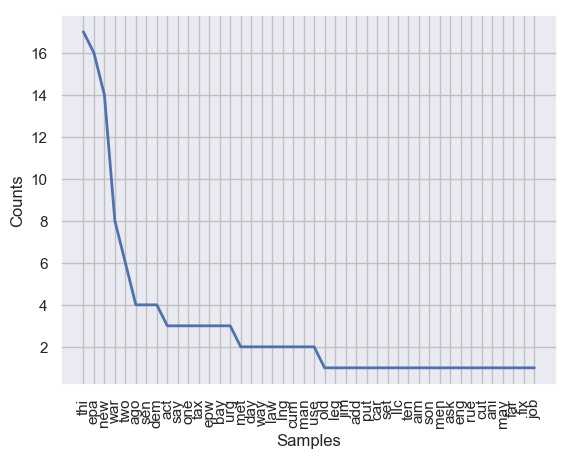

In [40]:
whcfdist[3].plot()

Η πιο συχνή λέξη τριών χαρακτήρων είναι η λέξη "thi". Αλλά τι σημαίνει "thi"? Είναι ουσιαστικά το "this" κομμένο από το Porter Stemmer. 

In [41]:
porter = nltk.stem.porter.PorterStemmer()
print (porter.stem('this'))

thi


Ας δοκιμάσουμε τώρα τον Snowball Stemer. Θα δείτε ότι το "this" το θεωρεί σωστά ως λέξη με 4 χαρακτήρες. 

this


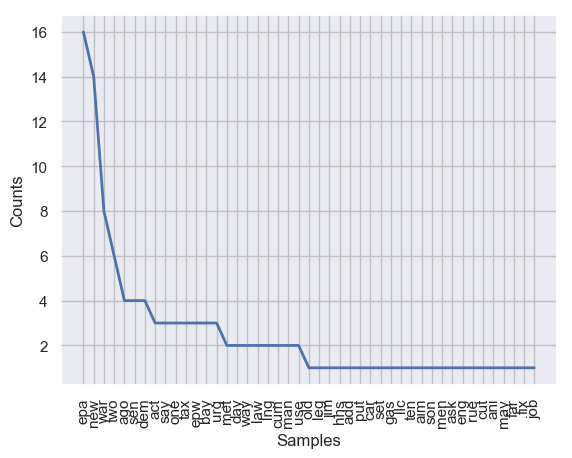

In [42]:
print (snowball.stem('this'))

whReleases['normalized_tokens'] = whReleases['tokenized_text'].apply(lambda x: normlizeTokens(x, stopwordLst = stop_words_nltk, stemmer = snowball))
whReleases['normalized_tokens_count'] = whReleases['normalized_tokens'].apply(lambda x: len(x))
whcfdist = nltk.ConditionalFreqDist(((len(w), w) for w in whReleases['normalized_tokens'].sum()))
whcfdist[3].plot()

Μπορούμε επίσης να δημιουργήσουμε ένα Conditional Probability Distribution ή [`ConditionalProbDist`](http://www.nltk.org/api/nltk.html#nltk.probability.ConditionalProbDist) με το `ConditionalFreqDist`. Για να γίνει αυτό όμως, χρειαζόμαστε ένα μοντέλο για probability distribution. Ένα απλό μοντέλο είναι το [`ELEProbDist`](http://www.nltk.org/api/nltk.html#nltk.probability.ELEProbDist) το οποίο δίνει την αναμενόμενη πιθανότητα για το probability distribution του πειράματος ώστε να παρατηρηθεί το frequency distribution. 

In [43]:
whcpdist = nltk.ConditionalProbDist(whcfdist, nltk.ELEProbDist)

#δημοφιλέστερη λέξη 2 γραμμάτων
print(whcpdist[2].max())

#και η πιθανότητα εμφάνισής της
print(whcpdist[2].prob(whcpdist[2].max()))

us
0.6470588235294118


Το μήκος αποτελεί ένα χαρακτηριστικό (feature) μιας λέξης, αλλά υπάρχουν πολλά πιο σημαντικά. Κάτι επίσης πολύ βασικό είναι ο ρόλος μια λέξης σε μια πρόταση ή αλλιώς το μέρος του λόγου (part of speech, POS). Εδώ θα ομαδοποιήσουμε (classifying) τις λέξεις σύμφωνα με το part of speech (POS), χρησιμοποιώντας το [`nltk.pos_tag()`](http://www.nltk.org/api/nltk.tag.html#nltk.tag.pos_tag). Τα tags που χρησιμοποιούνται είναι από το [Brown Corpus tagset](http://www.scs.leeds.ac.uk/amalgam/tagsets/brown.html).

In [44]:
whReleases['normalized_tokens_POS'] = [nltk.pos_tag(t) for t in whReleases['normalized_tokens']]

Αυτό μας δίνει μια νέα στήλη με τα αρχικά του ρόλου της λέξης και τη λέξη σε ένα tuple, ακριβώς όπως το δίνει το`nltk.ConditionalFreqDist()` function. Μπορούμε τώρα να φτιάξουμε ένα ακόμη conditional frequency distribution.

In [45]:
whcfdist_WordtoPOS = nltk.ConditionalFreqDist(whReleases['normalized_tokens_POS'].sum())
list(whcfdist_WordtoPOS.items())[:10]

[('whitehous', FreqDist({'JJ': 39, 'NN': 1})),
 ('share', FreqDist({'NN': 4})),
 ('wester', FreqDist({'RBR': 1, 'NN': 1})),
 ('girl', FreqDist({'NN': 2})),
 ('stori', FreqDist({'FW': 2})),
 ('push', FreqDist({'NN': 2})),
 ('stem', FreqDist({'NN': 12})),
 ('cell', FreqDist({'NN': 9, 'VBP': 3})),
 ('research', FreqDist({'NN': 9})),
 ('lila', FreqDist({'NN': 2, 'JJ': 1, 'CD': 1}))]

Αυτό μας δίνει το frequency κάθε λέξης ως μέρος του λόγου.

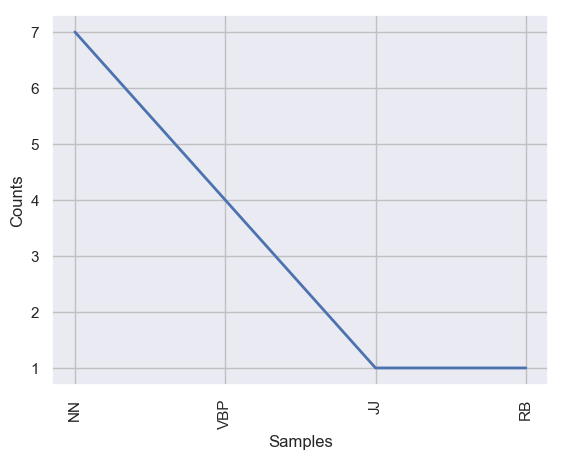

In [46]:
whcfdist_WordtoPOS['administr'].plot()

Αυτό που θέλουμε είναι όμως το αντίθετο. Η συχνότητα ενός μέρους του λόγου για κάθε λέξη. 

In [47]:
whcfdist_POStoWord = nltk.ConditionalFreqDist((p, w) for w, p in whReleases['normalized_tokens_POS'].sum())

Μπορούμε τώρα να βρούμε όλα τα επίθετα υπερθετικού βαθμού. 

In [48]:
whcfdist_POStoWord['JJS']

FreqDist({'strongest': 2, 'best': 1})

Τα πιο συχνά ουσιαστικά.

In [49]:
whcfdist_POStoWord['NN'].most_common(5)

[('bush', 24), ('presid', 23), ('iraq', 22), ('rhode', 18), ('island', 18)]

Να οπτικοποιήσουμε τα βασικά ρήματα σύμφωνα με τον αριθμό εμφάνισής τους. 

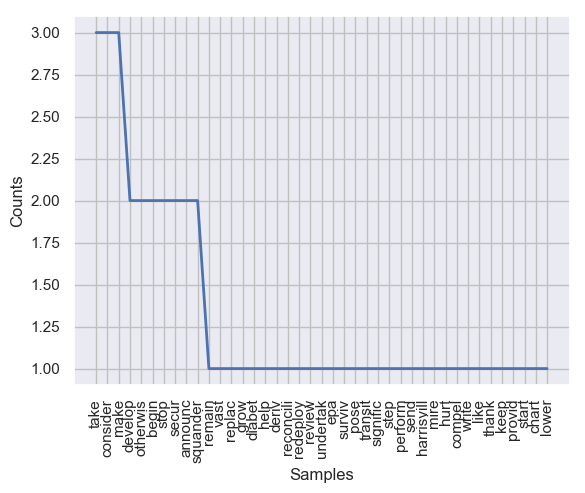

In [50]:
whcfdist_POStoWord['VB'].plot()

Μετά μπορούμε να κάνουμε το ίδιο με τις πιθανότητες των λέξεων (word probabilities).

In [51]:
whcpdist_POStoWord = nltk.ConditionalProbDist(whcfdist_POStoWord, nltk.ELEProbDist)

#πιο συχνά ουσιαστικά
print(whcpdist_POStoWord['NN'].max())

#και η πιθανότητα τους
print(whcpdist_POStoWord['NN'].prob(whcpdist_POStoWord['NN'].max()))

bush
0.017844136926438457


Επίσης μπορούμε να φτιάξουμε ένα *WORD CLOUD* !!! Και να βγάλουμε μερικά συμπεράσματα κατά προσέγγιση σε σχέση με τα σημαντικά ουσιαστικά και ρήματα του corpus:

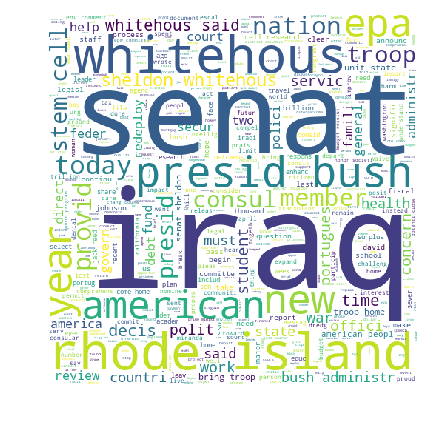

In [52]:
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(whReleases['normalized_tokens'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("whitehouse_word_cloud.pdf", format = 'pdf')

## <span style="color:red">*Άσκηση 2*</span>

<span style="color:red"> Ακριβώς κάτω από αυτό το κελί προσθέστε νέα κελιά στα οποία θα κάνετε filter, stem και lemmatize τα  tokens του corpus σας, και μετά θα φτιάξετε plots (με τίτλους και labels) που θα δείχνουν το frequency distribution, το word probability distribution και τουλάχιστον 2 conditional probability distributions, τα οποία στην συνέχεια θα σας φανούν χρήσιμα για να καταλάβετε το κοινωνιολογικό υπόβαθρο του corpus. Στην συνέχεια φτιάξτε ένα word cloud και γράψτε τα σχόλια και τα συμπεράσματά σας. </span>

#  Λεξιλογικές συνάψεις (collocations),

Όπως είδαμε και παραπάνω μπορεί να θέλουμε να βρούμε bigrams (φράσεις 2 λέξεων), trigrams (τριών λέξεων), n-grams (*n*-λέξεων φράσεις) ή skip-grams (μη συνεχόμενες 'φράσεις' με skip-length *n*). 

H αρχιτεκτονική skip-gram χρησιμοποιεί την κεντρική λέξη για να προβλέψει τις λέξεις που την περιβάλλουν. Η συνάρτηση στόχου στο skip-gram αθροίζει τις λογαριθμικές πιθανότητες των n λέξεων που περιβάλλουν αριστερά και δεξιά την λέξη στόχο wt για να παράξει την ακόλουθη συνάρτηση στόχου.

Θα ξεκινήσουμε με το [`nltk.collocations.BigramCollocationFinder`](http://www.nltk.org/api/nltk.html?highlight=bigramcollocationfinder#nltk.collocations.BigramCollocationFinder) class, στο οποίο δίνουμε raw λίστες από strings με τη μέθοδο `from_words()`. Από default βρίσκει μόνο συνεχόμενα bigrams, αλλά υπάρχει η επιλογή (`window_size`) που επιτρέπει να ψάξουμε για skip-grams.

In [54]:
whBigrams = nltk.collocations.BigramCollocationFinder.from_words(whReleases['normalized_tokens'].sum())
print("Υπάρχουν {} bigrams στον finder".format(whBigrams.N))

Υπάρχουν 1999 bigrams στον finder


Για να συγκρίνουμε τα bigrams πρέπει να πούμε στο nltk ποιο είναι το score function μας. Αρχικά κοιτάμε τα raw counts.

In [55]:
def bigramScoring(count, wordsTuple, total):
    return count

print(whBigrams.nbest(bigramScoring, 10))

[('rhode', 'island'), ('presid', 'bush'), ('sheldon', 'whitehous'), ('stem', 'cell'), ('whitehous', 'said'), ('bush', 'administr'), ('american', 'peopl'), ('bring', 'troop'), ('senat', 'sheldon'), ('troop', 'home')]


Μια σημείωση για τον τρόπο που δουλεύει το `BigramCollocationFinder`. Δεν χρησιμοποιεί τα strings εσωτερικά.

In [59]:
birgramScores = []

def bigramPrinting(count, wordsTuple, total):
    global birgramScores
    birgramScores.append("Η πρώτη λέξη είναι:  {}, Η δεύτερη λέξη είναι: {}".format(*wordsTuple))
    #Επιστρέφει None, οπότε όλα τα tuples θεωρείται ότι έχουν το ίδιο rank

whBigrams.nbest(bigramPrinting, 10)
print('\n'.join(birgramScores[:10]))

Η πρώτη λέξη είναι:  40, Η δεύτερη λέξη είναι: 4
Η πρώτη λέξη είναι:  4, Η δεύτερη λέξη είναι: 2
Η πρώτη λέξη είναι:  2, Η δεύτερη λέξη είναι: 2
Η πρώτη λέξη είναι:  2, Η δεύτερη λέξη είναι: 2
Η πρώτη λέξη είναι:  2, Η δεύτερη λέξη είναι: 2
Η πρώτη λέξη είναι:  2, Η δεύτερη λέξη είναι: 12
Η πρώτη λέξη είναι:  12, Η δεύτερη λέξη είναι: 12
Η πρώτη λέξη είναι:  12, Η δεύτερη λέξη είναι: 9
Η πρώτη λέξη είναι:  9, Η δεύτερη λέξη είναι: 4
Η πρώτη λέξη είναι:  4, Η δεύτερη λέξη είναι: 2


Κάθε λέξη παίρνει ένα αριθμητικό ID και υπάρχει ένα dictionary το οποίο καταγράφει τα ID σε κάθε λέξη που εμφανίζεται. Αυτό είναι η τυπική διαδικασία για βελτιστοποίηση της απόδοσης.

Δυο λέξεις μπορεί να εμφανίζονται μαζί τυχαία. Θυμηθείτε από το βιβλίο του Manning και Schütze (βιβλιογραφία αυτής της εβδομάδας - κεφ. 5 (“Collocations”) σελ.151-189.), ότι ένα t-value, 
μπορεί να υπολογιστεί για το κάθε ένα bigram για να δει πόσο σημαντική είναι η μεταξύ τους σχέση. Επίσης, μπορεί να θελήσετε να υπολογίσετε την $\chi^2$ , αναλογία πιθανότητας και να ελέγξετε στατιστικά τα κοινά σημεία από άποψη πληροφορίας. 

In [60]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
whBigrams.score_ngrams(bigram_measures.likelihood_ratio)[:40]
# άλλες επιλογές είναι student_t, chi_sq, likelihood_ratio, pmi

[(('rhode', 'island'), 223.98603169548517),
 (('stem', 'cell'), 146.69971583676724),
 (('presid', 'bush'), 124.78339903371592),
 (('sheldon', 'whitehous'), 97.83057167237577),
 (('unit', 'state'), 63.7408597571739),
 (('whitehous', 'said'), 50.85365409523493),
 (('jack', 'reed'), 46.61449955206517),
 (('honor', 'societi'), 45.00623576992483),
 (('american', 'peopl'), 44.4949166648486),
 (('bring', 'troop'), 43.29082241816299),
 (('bush', 'administr'), 42.73672706610401),
 (('cell', 'research'), 41.25934273451902),
 (('youth', 'program'), 38.276119099832265),
 (('troop', 'home'), 36.87601441962918),
 (('come', 'home'), 36.661589434392276),
 (('senat', 'sheldon'), 36.08708619238288),
 (('epw', 'committe'), 34.42122395939712),
 (('potenti', 'close'), 33.7794434582587),
 (('budget', 'resolut'), 32.192797473966614),
 (('district', 'columbia'), 31.62701894759353),
 (('humpti', 'dumpti'), 31.62701894759353),
 (('jose', 'socrat'), 31.62701894759353),
 (('prime', 'minist'), 31.62701894759353),


Υπάρχουν μερικές ακόμα διαθέσιμες μετρήσεις

In [61]:
[s for s in dir(bigram_measures) if s[0] != '_']

['chi_sq',
 'dice',
 'fisher',
 'jaccard',
 'likelihood_ratio',
 'mi_like',
 'phi_sq',
 'pmi',
 'poisson_stirling',
 'raw_freq',
 'student_t']

Ας δούμε και τα trigrams

In [62]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
whTrigrams = nltk.collocations.TrigramCollocationFinder.from_words(whReleases['normalized_tokens'].sum())
whTrigrams.score_ngrams(trigram_measures.student_t)[:20]

[(('bring', 'troop', 'home'), 2.449202865677887),
 (('senat', 'sheldon', 'whitehous'), 2.4481166557834917),
 (('stem', 'cell', 'research'), 2.2359229352888974),
 (('whitehous', 'said', 'today'), 1.9987987990993996),
 (('jack', 'reed', 'sheldon'), 1.7319953264758123),
 (('senat', 'youth', 'program'), 1.7319901251233376),
 (('unit', 'state', 'senat'), 1.73173525885207),
 (('new', 'direct', 'iraq'), 1.7316624399174225),
 (('reed', 'sheldon', 'whitehous'), 1.7314959966382275),
 (('sheldon', 'whitehous', 'said'), 1.7309411857075774),
 (('trillion', 'foregon', 'surplus'), 1.414209315486583),
 (('reconsid', 'potenti', 'close'), 1.4142064842289084),
 (('sent', 'clear', 'messag'), 1.414205599460885),
 (('today', 'confirm', 'hear'), 1.4141976365486753),
 (('select', 'committe', 'intellig'), 1.4141965748270473),
 (('general', 'david', 'petraeus'), 1.4141923279405353),
 (('take', 'respons', 'secur'), 1.4141923279405353),
 (('cell', 'enhanc', 'act'), 1.4141880810540235),
 (('respons', 'secur', 'gov

Η τα n-grams (για έναν αριθμό n). Τώρα π.χ. βάλαμε για 4 λέξεις.

In [63]:
Ngrams = nltk.ngrams(whReleases['normalized_tokens'].sum(), 4)
Counts = {}
for ngram in list(Ngrams):
    if ngram in Counts.keys():
        Counts[ngram] += 1
    else:
        Counts[ngram] = 1
Filtered = {}
for key in Counts.keys():
    if Counts[key] < 2:
        pass
    else:
        Filtered[key] = Counts[key]
print(Filtered)

{('stem', 'cell', 'research', 'whitehous'): 2, ('stem', 'cell', 'enhanc', 'act'): 2, ('begin', 'bring', 'troop', 'home'): 2, ('bring', 'troop', 'home', 'iraq'): 2, ('senat', 'sheldon', 'whitehous', 'said'): 3, ('sheldon', 'whitehous', 'said', 'today'): 3, ('member', 'senat', 'select', 'committe'): 2, ('senat', 'select', 'committe', 'intellig'): 2, ('take', 'respons', 'secur', 'govern'): 2, ('senat', 'jack', 'reed', 'sheldon'): 2, ('jack', 'reed', 'sheldon', 'whitehous'): 3, ('whitehous', 'welcom', 'rhode', 'island'): 2, ('portugues', 'american', 'citizen', 'rhode'): 2, ('american', 'citizen', 'rhode', 'island'): 2}


## <span style="color:red">*Άσκηση 3*</span>

<span style="color:red"> 
Ακριβώς κάτω από αυτό το κελί προσθέστε νέα κελιά στα οποία θα βρείτε στατιστικά σημαντικά bigrams, trigrams, quadgrams, higher-order *n*grams και skipgrams. Εξερευνήστε αν αυτά τα collocations αποτελούν ιδιωματισμούς της γλώσσας και άρα δεν γίνεται να μειωθεί η σημασία τους σε σχέση με το συνολικό νόημα των υπόλοιπων λέξεων. Μπορείτε να το τσεκάρετε αυτό ερευνώντας τις συχνότητες εμφάνισης λέξεων υπό όρους (conditional frequencies), π.χ. τι άλλο εμφανίζεται μαζί με την λέξη 'united' εκτός από το 'United States'. Αν οι φράσεις που παρατηρείτε είναι όντως ιδιωματικές (παροιμιακές κ.λπ.) τι σημαίνει αυτό για την κουλτούρα του κόσμου που τις χρησιμοποιεί? 

<span style="color:red">**Εξάσκηση**: Στο βιβλίο του Manning και Schütze στο Section 5.3.2 αναλύει πώς χρησιμοποιείται το *t*-test προκειμένου να βρούμε λέξεις των οποίων τα μοντέλα συνεμφάνισης βοηθούν στο να ξεχωρίσουμε 2 λέξεις. Χρησιμοποιήστε αυτή τη μέθοδο για να εξερευνήσετε τις φράσεις στο corpus σας. Για παράδειγμα, μπορείτε να δείτε ποιες λέξεις εμφανίζονται μετά τη λέξη "America" πολύ συχνότερα, παρά μετά από τη λέξη "Iraq"?</span> 

#  Kατανομές πιθανότητας (Distributional distances)

Για τη διερεύνηση ομοιότητας μεταξύ διαφορετικών κειμένων υπάρχουν πολλές τεχνικές που μετρούν τις συχνότητες εμφάνισης λέξεων και άλλες στατιστικές πληροφορίες που παράγονται από τα κείμενα. Επίσης, υπάρχουν τρόποι με τους οποίους οι λέξεις εκλαμβάνονται ως οντότητες
σε ειδικούς χώρους με ειδικά επιλεγμένες αποστάσεις ομοιότητας. Αν επιθυμούμε να συγκρίνουμε 2 διαφορετικά κείμενα ή σώματα κειμένων, τότε χρειαζόμαστε μία απόσταση (distance) ή μία απόκλιση (divergence) η οποία θα συγκρίνει τις 2 κατανομές. Για τη διερεύνηση τεχνικών μέτρησης υπολογισμού ομοιότητας θα χρησιμοποιήσουμε: 

+ Μέση απόκλιση του Kullback–Leibler (Kullback-Leibler (KL) divergence)
+ Δοκιμασία $\chi^2$ ($\chi^2$ divergence)
+ Έλεγχος κανονικότητας Kolmogorov-Smirnov (Kolmogorov-Smirnov (KS) distance)
+ Απόσταση Wasserstein (Wasserstein distance)

### Kullback-Leibler  και αποκλίση του $x^2$  ###

Η KL και η [$\chi^2$](https://bit.ly/2R3ZQeq) απόκλιση είναι μέρος της γενικότερης θεωρίας [f-divergence](https://en.wikipedia.org/wiki/F-divergence)  , ένα function από $D_f (P || Q)$ που υπολογίζει τις αποστάσεις μεταξυ δυο κατανομών πιθανότητας P και Q. Η KL  $f(t)$ είναι $ t \text{ log } t $, όταν το $\chi^2$ είναι $t^2-1$. Η KL προέρχεται από τη [θεωρία της πληροφορίας](https://bit.ly/2SGn7Q8) και το $\chi^2$ από τη [θεωρία του μέτρου](https://bit.ly/2TnyNrd) (measure theory). Η απόκλιση υπολογίζει την σχετική εντροπία ανάμεσα σε 2 κατανομές -- πώς διαφέρουν από πλευράς πληροφορίας (bits), ενώ το $\chi^2$ υπολογίζει εάν και από τις 2 κατανομές προκύπτουν τα ίδια στατιστικά συμπεράσματα.  

Πιο συγκεκριμένα, αν έχουμε 2 διακριτές κατανομές πιθανότητας $P$ και $Q$, η απόκλιση Kullback-Leibler από το $Q$ στο $P$ ορίζεται ώς:

$D_{\mathrm{KL}}(P\|Q) = \sum_i P(i) \, \log\frac{P(i)}{Q(i)}$.

Tο [scipy.stats.entropy()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html) function κάνει αυτόν τον υπολογισμό για εμάς, το οποίο παίρνει 2 πίνακες (arrays) πιθανοτήτων και υπολογίζει την απόκλιση KL. Να θυμάστε ότι η  απόκλιση KL σε γενικές γραμμές δεν έχει [αντιμεταθετική ιδιότητα](https://bit.ly/2Vz244a) , π.χ. $D_{\mathrm{KL}}(P\|Q) \neq D_{\mathrm{KL}}(Q\|P)$ .

Επίσης, να θυμάστε ότι η απόκλιση KL αποτελεί το άθροισμα στοιχειωδών αποκλίσεων. Η βιβλιοθήκη Scipy μας παρέχει το [scipy.special.kl_div()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.kl_div.html#scipy-special-kl-div) το οποίο υπολογίζει στοιχειώδεις αποκλίσεις για εμάς.

Η απόκλιση του $\chi^2$ ορίζεται ώς:

$D_{\mathrm{\chi^2}}(P\|Q) = \sum_i \left(\frac{P(i)}{Q(i)}-1\right)^2$. 

Και το $\chi^2$ δεν έχει αντιμεταθετική ιδιότητα. Ο κώδικας για τον υπολογισμό του υπάρχει επίσης στο scipy.

### Το τεστ Kolmogorov-Smirnov (K-S)  ###

Ο έλεγχος καλής προσαρμογής Kolmogorov-Smirnov χρησιμοποιείται και αυτός για τον έλεγχο της απόστασης ομοιότητας μεταξύ δύο αθροιστικών κατανομών. Το Kolmogovorov-Smirnov test 2 δειγμάτων, υπολογίζει στατιστικά την απόσταση μεταξύ 2 αθροιστικών κατανομών που συγκρίνουμε και μαζί την απόκλιση του  $x^2$ και αποτελεί έναν από τους πιο κοινούς ελέγχους απόστασης στην στατιστική. Μπορεί να ερμηνευθεί και ως μια δοκιμή για το αν δύο κατανομές προέρχονται από την ίδια υποκείμενη κατανομή (underlying distribution)/ από τα ίδια δεδομένα. Όπως και με τα προηγούμενα, ο κώδικας είναι άμεσα διαθέσιμος στο scipy. 

### Wasserstein Distance ###

Η μετρική Wasserstein είναι μια συνάρτηση απόστασης η οποία επιδρά πάνω σε κατανομές. Κάθε κατανομή αναπαρίσταται από μια μάζα ”άμμου” και το ελάχιστο κόστος μεταφοράς της μάζας από τη μια κατανομή στην άλλη είναι η απόσταση Wasserstein. Γι’ αυτό το λόγο η μετρική συχνά ονομάζεται και Earth Mover’s Distance. Η συσταδοποίηση των κειμένων συνήθως γίνεται με αναπαραστάσεις που διαχειρίζονται τη στατιστική πληροφορία της συλλογής και αγνοούν την εσωτερική δομή του αντικειμένου - κειμένου.

Η μετρική Wasserstein διερευνά τα κείμενα σαν οντότητες με εσωτερική μάζα (στην περίπτωση των κειμένων μάζες λέξεων). Η διαφορετική αντίληψη αυτής της μετρικής παράγει διαφορετικά ποιοτικά αποτελέσματα τα οποία εξαρτώνται από την σημασιολογική έννοια που κρύβει το κάθε κείμενο.

### Computing ###

Για να τα κάνουμε αυτά πρέπει πρώτα να φτιάξουμε πίνακες αντικειμένων (arrays). 

Ας συγκρίνουμε τα δελτία τύπου του Whitehouse με αυτά του Kennedy. Φυσικά πρέπει πρώτα να τα κατεβάσουμε και να τα φορτώσουμε σε ένα DataFrame.

In [64]:
kenReleases = getGithubFiles('https://api.github.com/repos/lintool/GrimmerSenatePressReleases/contents/raw/Kennedy', maxFiles = 10)
kenReleases[:5]

,name,text,path,html_url,download_url
0,01Apr2005Kennedy14.txt,FOR IMMEDIATE RELEASE FOR IMMEDIATE...,raw/Kennedy/01Apr2005Kennedy14.txt,https://github.com/lintool/GrimmerSenatePressR...,https://raw.githubusercontent.com/lintool/Grim...
1,01Aug2005Kennedy12.txt,FOR IMMEDIATE RELEASE FOR IMMEDIATE...,raw/Kennedy/01Aug2005Kennedy12.txt,https://github.com/lintool/GrimmerSenatePressR...,https://raw.githubusercontent.com/lintool/Grim...
2,01Aug2006Kennedy10.txt,FOR IMMEDIATE RELEASE FOR IMMEDIATE ...,raw/Kennedy/01Aug2006Kennedy10.txt,https://github.com/lintool/GrimmerSenatePressR...,https://raw.githubusercontent.com/lintool/Grim...
3,01Aug2006Kennedy11.txt,FOR IMMEDIATE RELEASE FOR IMMEDIATE ...,raw/Kennedy/01Aug2006Kennedy11.txt,https://github.com/lintool/GrimmerSenatePressR...,https://raw.githubusercontent.com/lintool/Grim...
4,01Aug2006Kennedy12.txt,FOR IMMEDIATE RELEASE FOR IMMEDIATE ...,raw/Kennedy/01Aug2006Kennedy12.txt,https://github.com/lintool/GrimmerSenatePressR...,https://raw.githubusercontent.com/lintool/Grim...


Μετά μπορούμε να κάνουμε tokenize, stem και να διώξουμε τα stop words, όπως κάναμε και πριν.

In [65]:
kenReleases['tokenized_text'] = kenReleases['text'].apply(lambda x: nltk.word_tokenize(x))
kenReleases['normalized_tokens'] = kenReleases['tokenized_text'].apply(lambda x: normlizeTokens(x, stopwordLst = stop_words_nltk, stemmer = snowball))

Τώρα πρέπει να συγκρίνουμε τις δυο συλλογές λέξεων, να αφαιρέσουμε τις λέξεις που δεν εμφανίζονται και στις 2 και να ορίσουμε δείκτες στις λέξεις που έμειναν. 

In [66]:
whWords = set(whReleases['normalized_tokens'].sum())
kenWords = set(kenReleases['normalized_tokens'].sum())

#Αλλάξτε το & σε | αν θέλετε να κρατήσετε όλες τις λέξεις 
overlapWords = whWords & kenWords

overlapWordsDict = {word: index for index, word in enumerate(overlapWords)}
overlapWordsDict['student']

182

Τώρα μπορούμε να μετρήσουμε τις εμφανίσεις κάθε λέξης σε κάθε σώμα κειμένων και να δημιουργήσουμε τους πίνακές μας. Σημειώστε ότι δεν χρειάζεται να χρησιμοποιούμε numpy arrays όπως κάνουμε εδώ. Θα μπορούσαμε απλώς να χρησιμοποιήσουμε μια λίστα, αλλά οι πίνακες είναι γρηγορότεροι σε numpy, γι 'αυτό σας ενθαρρύνουμε να αρχίσετε να τους χρησιμοποιείτε.

In [68]:
def makeProbsArray(dfColumn, overlapDict):
    words = dfColumn.sum()
    countList = [0] * len(overlapDict)
    for word in words:
        try:
            countList[overlapDict[word]] += 1
        except KeyError:
            #η λέξη δεν εμφανίζεται συχνά οπότε την περνάμε 
            pass
    countArray = np.array(countList)
    return countArray / countArray.sum()

whProbArray = makeProbsArray(whReleases['normalized_tokens'], overlapWordsDict)
kenProbArray = makeProbsArray(kenReleases['normalized_tokens'], overlapWordsDict)
kenProbArray.sum()
#Εδώ υπάρχει ένα μικρό σφάλμα κινητής υποδιαστολής (floating point)
#αλλά είναι πολύ μικρό για  να το δούμε και δεν έχει πολύ μικρή σημασία εδώ 

1.0

Μπορούμε τώρα να υπολογίσουμε την απόκλιση KL. Προσοχή στην ασσυμετρία. Χρησιμοποιείστε την γενικευμένη Jensen-Shannon απόκλιση μεταξύ κατανομών [the Jensen–Shannon divergence](https://en.wikipedia.org/wiki/Jensen%E2%80%93Shannon_divergence),η οποία είναι η KL-απόκλιση μεταξύ των κατανομών και το μέσο (average) και των δύο κατανομών, π.χ. το μέσο σημείο (midpoint), σε περίπτωση που θέλετε συμμετρία. 

In [69]:
wh_kenDivergence = scipy.stats.entropy(whProbArray, kenProbArray)
print (wh_kenDivergence)
ken_whDivergence = scipy.stats.entropy(kenProbArray, whProbArray)
print (ken_whDivergence)

0.6176419677476952
0.5877085657188859


Μετά, μπορούμε να κάνουμε έναν υπολογισμό στοιχείων και να δούμε ποιες είναι οι λέξεις που κάνουν τα δυο corpora διακριτά μεταξύ τους.

In [70]:
wh_kenDivergence_ew = scipy.special.kl_div(whProbArray, kenProbArray)
kl_df = pandas.DataFrame(list(overlapWordsDict.keys()), columns = ['word'], index = list(overlapWordsDict.values()))
kl_df = kl_df.sort_index()
kl_df['elementwise divergence'] = wh_kenDivergence_ew
kl_df[:10]

,word,elementwise divergence
0,america,1.398263e-03
1,scienc,1.568293e-03
2,appear,4.815330e-05
3,committe,1.151897e-04
4,made,6.723958e-04
5,approv,3.046640e-04
6,act,1.254907e-03
7,allow,2.293277e-07
8,million,1.344792e-03
9,intellig,2.023335e-03


In [71]:
kl_df.sort_values(by='elementwise divergence', ascending=False)[:10]

,word,elementwise divergence
197,iraq,0.086929
252,bush,0.042354
261,stem,0.021884
139,law,0.020547
103,protect,0.019358
156,american,0.018154
98,depart,0.017650
32,bring,0.014128
317,member,0.012429
151,war,0.011739


Στο σημείο αυτό θα εφαρμόσουμε ό,τι μάθαμε σήμερα στα κείμενα του Guternberg που υπάρχουν μέσα στο nltk και θα προσπαθήσουμε να διακρίνουμε κάποια patterns μεταξύ τους. 

Πρώτα ας μετατρέψουμε κάθε κείμενο σε ομαλοποιημένα tokens. Παρατηρήστε ότι στο πρώτο βήμα δεν πετάμε τα stopwords. 

In [72]:
fileids = nltk.corpus.gutenberg.fileids()
corpora = []
for fileid in fileids:
    words = nltk.corpus.gutenberg.words(fileid)
    normalized_tokens = normlizeTokens(words, stopwordLst = [], stemmer = snowball)
    corpora.append(normalized_tokens)

In [90]:
fileids

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

Στην συνέχεια ας χωρίσουμε τα ομαλοποιημένα tokens σε stopwords και non-stopwords.

In [73]:
corpora_s = []
corpora_nons = []
for corpus in corpora:
    s = []
    nons = []
    for word in corpus:
        if word in stop_words_nltk:
            s.append(word)
        else:
            nons.append(word)
    corpora_s.append(s)
    corpora_nons.append(nons)

Καθορίστε μερικά functions για τον υπολογισμό της απόκλισης και των αποστάσεων.

In [74]:
def kl_divergence(X, Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    D_kl = scipy.stats.entropy(p, q)
    return D_kl

def chi2_divergence(X,Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    return scipy.stats.chisquare(p, q).statistic

def Divergence(corpus1, corpus2, difference="KL"):
    """Difference parameter can equal KL, Chi2, or Wass"""
    freqP = nltk.FreqDist(corpus1)
    P = pandas.DataFrame(list(freqP.values()), columns = ['frequency'], index = list(freqP.keys()))
    freqQ = nltk.FreqDist(corpus2)
    Q = pandas.DataFrame(list(freqQ.values()), columns = ['frequency'], index = list(freqQ.keys()))
    if difference == "KL":
        return kl_divergence(P, Q)
    elif difference == "Chi2":
        return chi2_divergence(P, Q)
    elif difference == "KS":
        try:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency']).statistic
        except:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency'])
    elif difference == "Wasserstein":
        try:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None).statistic
        except:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None)

Τώρα θα υπολογίσουμε την απόκλιση του KL για κάθε ζεύγος corpora, θα μετατρέψουμε τα αποτελέσματα σε ένα matrix, και θα οπτικοποιήσουμε το matrix με ένα heatmap. Θυμηθείτε ότι το $D_{\mathrm{KL}}(P\|Q)$ μετρά το ποσοστό της πληροφορίας που χάνεται (information loss), ενώ το $Q$ χρησιμοποιείται για να προσέγγισει το $P$. Στην προκειμένη περίπτωση, τα κελιά αντιπροσωπεύουν το $P$s που χρησιμεύει για τον υπολογισμό των αποκλίσεων KL και οι στήλες τα $Q$s. Οπότε, κάθε κελί μετρά το ποσοστό της χαμένης πληροφορίας, ενώ η κατανομή των λέξεων της στήλης text χρησιμοποείται για να προσεγγίσει την κατανομή λέξεων στο row text.Επειδή η απόκλιση KL είναι κατευθυντική, ώστε η απόκλιση του $P$ από το $Q$ να είναι διαφορετική από αυτή του $Q$ προς το $P$, το matrix είναι ασύμμετρο και περιέχει μοναδικές πληροφορίες πάνω και κάτω από τη διαγώνιο. Το ίδιο ισχύει και για την απόκλιση του $\chi^2$.

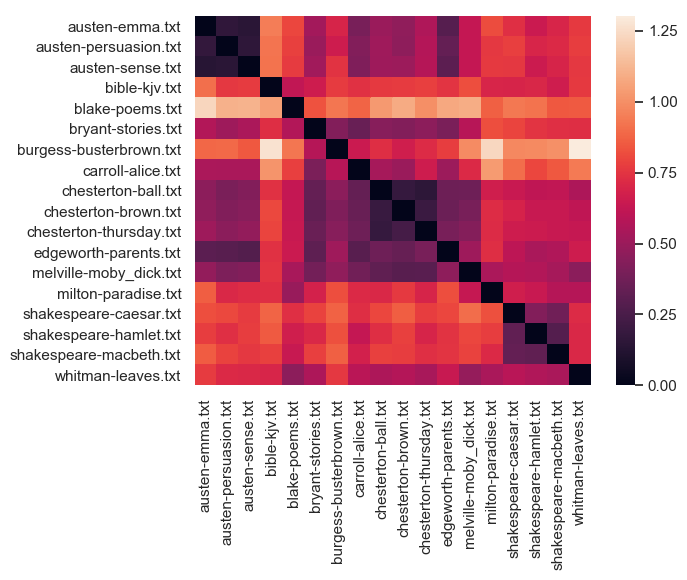

In [75]:
L = []
for p in corpora:
    l = []
    for q in corpora:
        l.append(Divergence(p,q, difference = 'KL'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

Παρατηρήστε ότι τα βιβλία του ίδιου συγγραφέα έχουν την μικρότερη απόκλιση KL μεταξύ τους. 

Για να αποκαλύψετε περισσότερα patterns, ας κάνουμε μια πολυδιάστατη (multidimensional) κλίμακα του matrix.

/Users/catherine/.pyenv/versions/3.6.5/lib/python3.6/site-packages/sklearn/manifold/mds.py:411: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


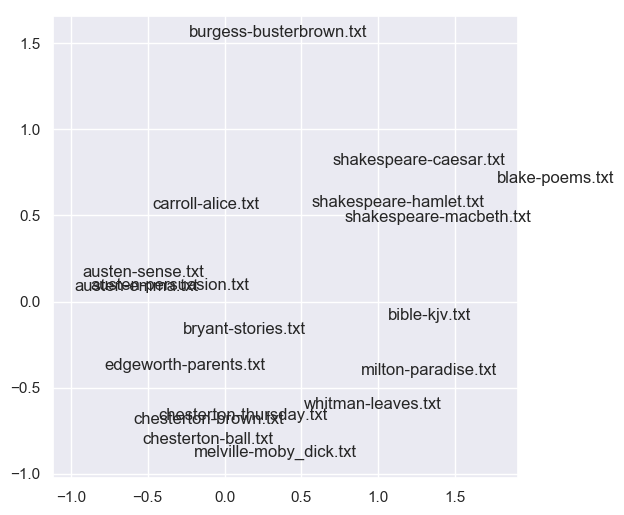

In [76]:
mds = sklearn.manifold.MDS()
pos = mds.fit(M).embedding_
x = pos[:,0]
y = pos[:,1]
fig, ax = plt.subplots(figsize = (6,6))
plt.plot(x, y, ' ')
for i, txt in enumerate(fileids):
    ax.annotate(txt, (x[i],y[i]))

Βλέπετε μερικά patterns στην παραπάνω εικόναn? Βγάζουν νόημα?

Μπορεί να θέλουμε να επικεντρωθούμε στην κατανομή των stopwords και των non-stopwords. Ας πραγματοποιήσουμε την ανάλυση ξανά πρώτα για τα stopwords και στην συνέχεια για τα non-stopwords.

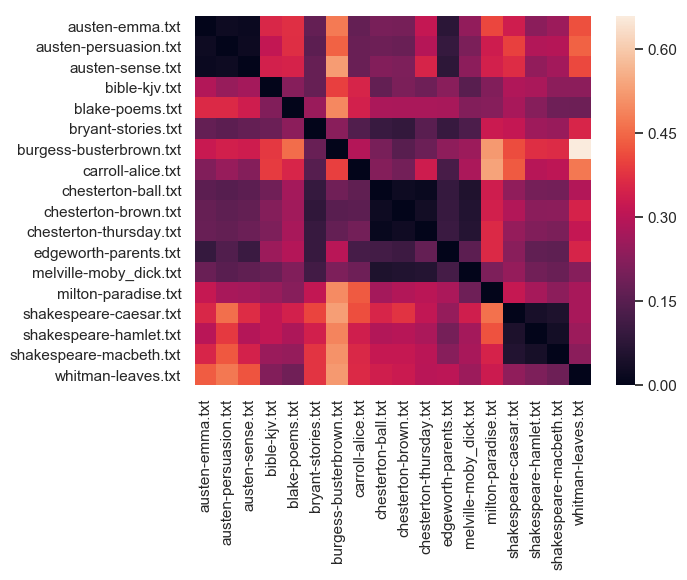

In [77]:
L = []
for p in corpora_s:
    l = []
    for q in corpora_s:
        l.append(Divergence(p,q, difference='KL'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

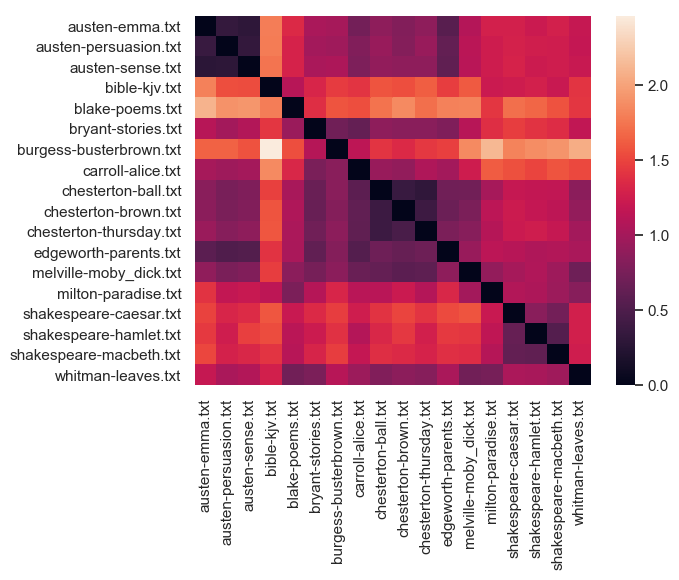

In [78]:
L = []
for p in corpora_nons:
    l = []
    for q in corpora_nons:
        l.append(Divergence(p,q, difference='KL'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

Τώρα ας υπολογίσουμε την ασύμμετρη απόκλιση $\chi^2$.

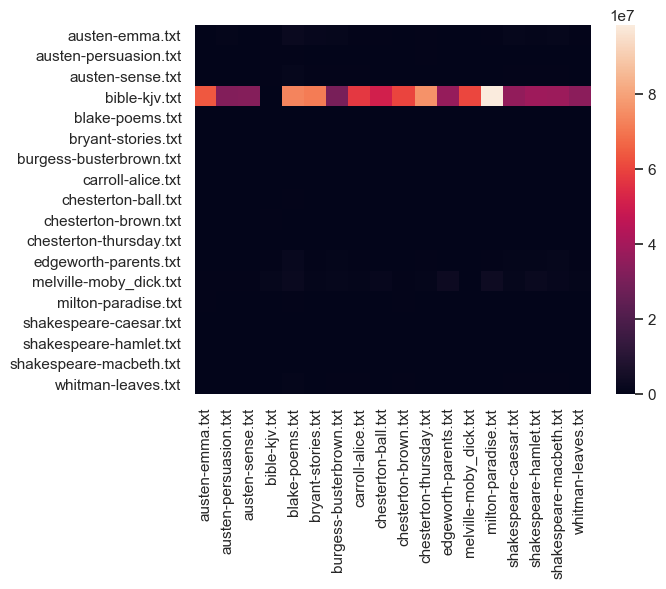

In [80]:
L = []
for p in corpora_nons:
    l = []
    for q in corpora_nons:
        l.append(Divergence(p,q, difference='Chi2'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

Και την απόσταση KS:

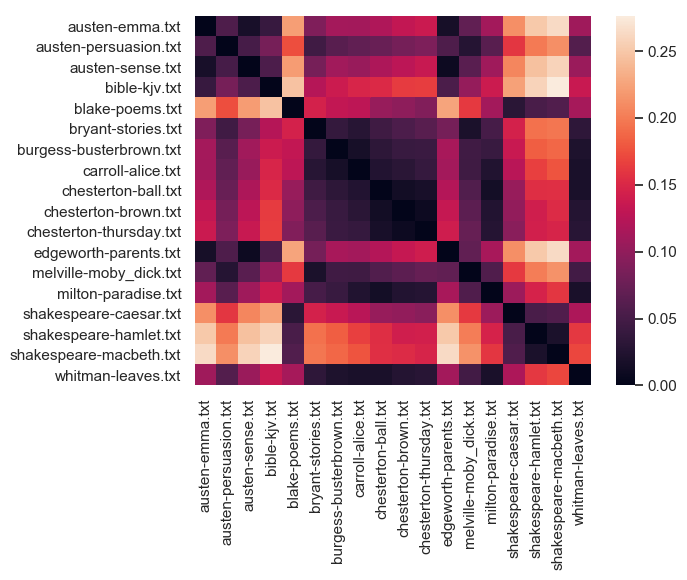

In [81]:
L = []
for p in corpora_nons:
    l = []
    for q in corpora_nons:
        l.append(Divergence(p,q, difference='KS'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

Και τέλος την απόσταση Wasserstein ή αλλιώς την απόσταση "earth mover".

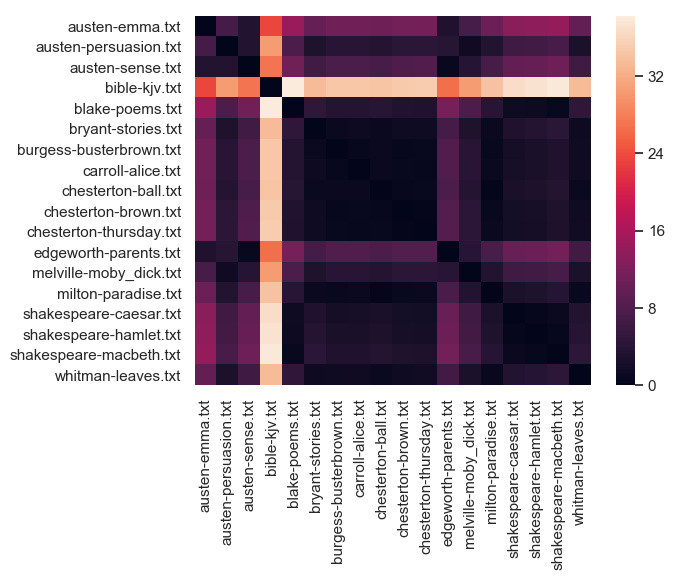

In [82]:
L = []
for p in corpora_nons:
    l = []
    for q in corpora_nons:
        l.append(Divergence(p,q, difference='Wasserstein'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()

Μπορείτε να δείτε ότι η Βίβλος είναι εξαιρετικά αποκλίνουσα και αυτό κάνει κάπως δύσκολη την ανάγνωση του plot. Ας το διορθώσουμε λαμβάνοντας υπόψη το log του κάθε κελιού, το οποίο θα μειώσει την απόσταση της Βίβλου από τα άλλα κείμενα ως outlier.

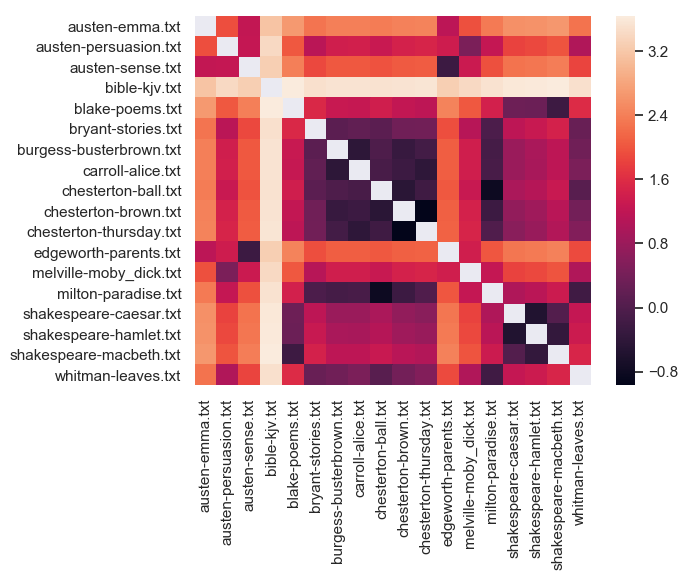

In [83]:
ax = sns.heatmap(div.apply(np.log).replace([np.inf, -np.inf], np.nan))
plt.show()

Αυτό είναι πιο ευανάγνωστο, καθώς συνεχίζει να δείχνει ότι η Βίβλος είναι αποκλίνουσα, αλλά και η υπόλοιπη δομή είναι επίσης ορατή, όπως η απόκλιση της *Emma* και της *Λογικής και ευαισθησίας* της Austen, και της Edgeworth το *The Parent's Assistant*. 

Αν θέλουμε να ξανατρέξουμε όλο τον κώδικα σε ένα νεό data set που θα φτιάξουμε, μπορούμε να το κάνουμε πιο εύκολα με τη βιβλιοθήκη lucem_illud. Ας δοκιμάσουμε τα κείμενα του Shakespeare από την προηγούμενη βδομάδα. 

In [115]:
shakespeare_df = lucem_illud.loadTextDirectory('../data/Shakespeare')
#shakespeare_df.index.names = ['name']
shakespeare_df

,text
julius_caesar.txt,"Dramatis Personae\n\n JULIUS CAESAR, Roman st..."
as_you_like_it.txt,AS YOU LIKE IT\n\nby William Shakespeare\n\n\n...
tempest.txt,"The Tempest\n\nActus primus, Scena prima.\n\nA..."
phoenix_and_the_turtle.txt,THE PHOENIX AND THE TURTLE\n\nby William Shake...
king_lear.txt,The Tragedie of King Lear\n\n\nActus Primus. S...
passionate_pilgrim.txt,THE PASSIONATE PILGRIM\n\nby William Shakespea...
cymbeline.txt,The Tragedie of Cymbeline\n\nActus Primus. Sco...
coriolanus.txt,THE TRAGEDY OF CORIOLANUS\n\nby William Shakes...
two_gentlemen_of_verona.txt,THE TWO GENTLEMEN OF VERONA\n\nby William Shak...
rape_of_lucrece.txt,THE RAPE OF LUCRECE\n\nby William Shakespeare\...


Κάνουμε stem και αφαιρούμε τα stopwords

In [116]:
shakespeare_df['tokenized_text'] = shakespeare_df['text'].apply(lambda x: nltk.word_tokenize(x))
shakespeare_df['normalized_tokens'] = shakespeare_df['tokenized_text'].apply(lambda x: normlizeTokens(x, stopwordLst = stop_words_nltk, stemmer = porter))

Φτιάξτε το αρχείο του corpus και μετά ένα heatmap:

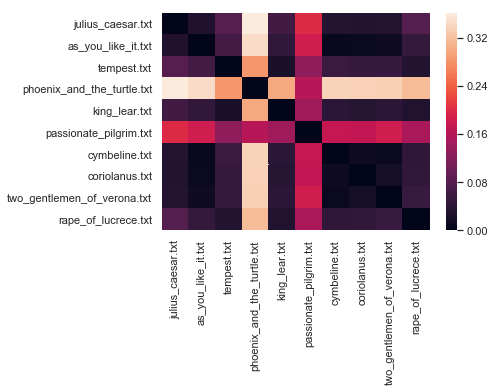

In [118]:
measure = 'KS' #"KL", "Chi2", "KS", "Wasserstein"
num_of_texts = 10 #Όσο μεγαλύτερος είναι αυτός ο αριθμός, τόσο περισσότερη ώρα θα κάνει για να τρέξει ο κώδικας.
corpora_sp = list(shakespeare_df[:num_of_texts]['normalized_tokens'])
L = []
for p in corpora_sp:
    l = []
    for q in corpora_sp:
        l.append(Divergence(p,q, difference=measure))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pandas.DataFrame(M, columns = fileids_sp, index = fileids_sp)
ax = sns.heatmap(div)
plt.show()

Τι είναι το "The Passionate Pilgrim" και το "The Phoenix and the Turtle"? Άγνωστα ποιήματα του Shakespeare που είναι δύσκολο να ομαδοποιηθούν γιατί είναι πολύ διαφορετικά από οτιδήποτε άλλο έχει γράψει. 

## <span style="color:red">*Άσκηση 4*</span>

<span style="color:red"> 
Ακριβώς κάτω από αυτό το κελί προσθέστε νέα κελιά στα οποία θα υπολογίσετε την απόκλιση KL, του $\chi^2$ και τις αποστάσεις KS και Wasserstein μεταξύ τεσσάρων διαφορετικών corpora, στην συνέχεια φτιάξτε heatmaps, και μετά οπτικοποιήστε τα σε έναν χώρο 2 διαστάσεων, όπως δείξαμε παραπάνω. Τι φανερώνουν αυτές οι μετρήσεις για τις σχέσεις ανάμεσα στα κείμενά σας? Ποια ανάλυση (αποστάσεις ή αποκλίσεις) ξεχωρίζουν τους συγγραφείς των κειμένων καλύτερα?

<span style="color:red">**Εξάσκηση**: Υπολογίστε την απόκλιση Jensen-Shannon (https://en.wikipedia.org/wiki/Jensen–Shannon_divergence) μεταξύ των τεσσάρων corpora. Ποια είναι η σχέση μεταξύ των αποκλίσεων KL και JS?</span> 